The objective of this experiment is to understand word2vec.

In this experiment we will use **Mahabharata** as our text corpus

##### Importing the required packages

In [1]:
import gensim
# Operating System
import os
# Regular Expression
import re
# nltk packages
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.porter import *
from nltk.stem.snowball import SnowballStemmer
# Basic Packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# PCA Package
from sklearn.decomposition import PCA

Snowball is a small string processing language designed for creating stemming algorithms for use in Information Retrieval. 

##### Creating a new instance of a language specific subclass.

In [2]:
stemmer = SnowballStemmer("english")

##### In below cell we are trying to pre-process the text data and not stemming the stop words

In [3]:
stopWords = pd.read_csv('stopwords.txt').values

class MySentences(object):
    def __init__(self, fnamelist):
        self.fnamelist = fnamelist
        # Creating a set of vocabulary
        self.vocabulary = set([])

    def __iter__(self):
        for fname in self.fnamelist:
            for line in open(fname, encoding='latin1'):
                # Find all the words that has letters from 2 - 15. If the words are longer than that ignore.
                words = re.findall(r'(\b[A-Za-z][a-z]{2,15}\b)', line)
                # Stemming a word.
                words = [ stemmer.stem(word.lower()) for word in words if not word.lower() in stopWords]
                for word in words:
                    self.vocabulary.add(word)
                yield words

##### In below cell we will read the data using an iterator in the class MySentences(). 

Gensim model: https://radimrehurek.com/gensim/models/word2vec.html

In [4]:
sentences = MySentences(['MB.txt']) # a memory-friendly iterator
model = gensim.models.Word2Vec(sentences, min_count=100)
model = model.save("MB2Vec.bin")
model_load = gensim.models.Word2Vec.load('MB2Vec.bin')

In [ ]:
# model_load = model

##### Lets see the most similar words related to different characters

In [5]:
model_load.wv.most_similar('krishna')[:3]

[('kesava', 0.8121841549873352),
 ('vasudeva', 0.7725369334220886),
 ('govinda', 0.705391526222229)]

In [6]:
model_load.wv.most_similar('arjuna')[:3]

[('partha', 0.8814092874526978),
 ('dhananjaya', 0.8428341746330261),
 ('vibhatsu', 0.827560305595398)]

In [7]:
model_load.wv.most_similar('virata')[:3]

[('drupada', 0.8713051676750183),
 ('chedi', 0.8249099850654602),
 ('kasi', 0.8184924125671387)]

##### We will save the trained vectors .

In [ ]:
#model = model.save("MB2Vec.bin")

##### Iterating through the vocabulary and constructing the word and vector list

In [8]:
words_list = np.array([])
vector_list = np.array([])
for i in model_load.wv.vocab:
    # print(i)
    try :
        words_list = np.append(words_list, i)
        vector_list = np.append(vector_list, model_load.wv[i])
    except :
        pass
vector_list = vector_list.reshape(len(model_load.wv.vocab), -1)

In [9]:
vector_list

array([[ 0.08934455,  0.1577087 ,  0.10928196, ...,  0.06659309,
        -0.18730566,  0.0408443 ],
       [ 0.00960101, -0.18176453,  0.75657958, ...,  0.39727277,
        -0.29713699, -0.3019712 ],
       [ 0.24288535,  0.34268048, -0.004009  , ...,  0.16819203,
        -0.29780588,  0.08784001],
       ...,
       [-0.39574307,  0.03334375, -0.53665352, ...,  0.14169978,
        -0.15535726,  0.22689809],
       [-0.06705227,  0.41990551, -0.68623579, ..., -0.11718254,
         0.43685609,  0.68196851],
       [-0.20414992, -0.03195424, -0.29915854, ...,  0.10838486,
        -0.21143138,  0.02838665]])

##### Applying PCA on the vector_list to reduce the dimensions

In [10]:
pca = PCA(n_components=2)
pca.fit(vector_list)
compressed_list =pca.transform(vector_list)

##### Checking the shape of the vector_list

In [11]:
vector_list.shape

(1539, 100)

##### Checking the shape of the compressed_list after applying PCA

In [12]:
compressed_list.shape

(1539, 2)

##### Let us find the location of some characters in word_list to get the locations

In [13]:
characters = ['dussasana','sakuni','duryodhana','bhishma', 'krishna','madri','pandu', 'kunti', 'karna', 'bhima', 'arjuna', 'nakula', 'sahadeva', 'draupadi']
locs = [np.where(words_list == x)[0][0] for x in characters]
print(locs)

[1466, 1465, 1367, 19, 1122, 1350, 1109, 225, 1498, 1413, 1243, 1485, 1375, 1443]


##### Let us Plot the data

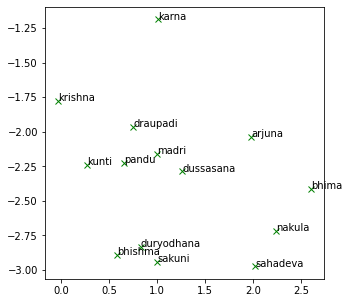

In [14]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
for character, pos in zip(characters, locs):
    m = model_load.wv.get_vector(character)
    value = pca.transform([m])[0]
    ax.plot(value[0], value[1], "gx")
    ax.annotate(words_list[pos], xy=value, xytext=value)
plt.show()
fig.savefig('word2vec.png')

###### Characters are grouped together based on word2vec learnt by the model.

##### We will see the most similar characters related to characters list as shown below.

##### characters = ['dussasana','sakuni','duryodhana','bhishma', 'krishna','madri','pandu', 'kunti', 'karna', 'bhima', 'arjuna', 'nakula', 'sahadeva', 'draupadi']

In [15]:
# Persons closer to the characters of our choice based on the word2vec model
for character in characters:
    near = model_load.wv.most_similar(character)[:5]
    nearNames = [x[0] for x in near]
    print(character, ':'.join(nearNames), sep="\t")

dussasana	sakuni:duhsasana:vikarna:sahadeva:chitrasena
sakuni	dussasana:duhsasana:vikarna:sahadeva:valhika
duryodhana	dussasana:suyodhana:jayadratha:sakuni:dhritarashtra
bhishma	salya:vaisampayana:sanjaya:phalguna:aswatthaman
krishna	kesava:vasudeva:govinda:madhava:dhananjaya
madri	valiant:subhadra:nakula:prishata:somadatta
pandu	kunti:pritha:radha:suta:subhadra
kunti	pritha:radha:pandu:suta:subhadra
karna	yuyudhana:abhimanyu:bhagadatta:somadatta:sikhandin
bhima	bhimasena:vrikodara:abhimanyu:arjuna:dhananjaya
arjuna	partha:dhananjaya:vibhatsu:bhima:kama
nakula	sahadeva:valhika:valiant:chitrasena:somadatta
sahadeva	nakula:valhika:sikhandin:dhrishtadyumna:vikarna
draupadi	drupada:suvala:subhadra:madri:dussasana


In [16]:
#TASK Modify the gensim word2vec model to train skip gram model.


skipgram_model = gensim.models.Word2Vec(sentences, min_count=100, sg=1)
skipgram_model = skipgram_model.save("MB2Vec_sg.bin")
model_load1 = gensim.models.Word2Vec.load('MB2Vec_sg.bin')


In [17]:
model_load1.wv.most_similar('krishna')[:3]

[('kesava', 0.7680883407592773),
 ('vasudeva', 0.75233393907547),
 ('govinda', 0.716886043548584)]

In [18]:
model_load1.wv.most_similar('arjuna')[:3]

[('partha', 0.7983713150024414),
 ('phalguna', 0.7659530639648438),
 ('dhananjaya', 0.7427254915237427)]

In [19]:
model_load1.wv.most_similar('virata')[:3]

[('drupada', 0.8777790069580078),
 ('kasi', 0.8138987421989441),
 ('magadha', 0.8096978664398193)]

In [28]:
words_list_sg = np.array([])
vector_list_sg = np.array([])
for i in model_load1.wv.vocab:
    # print(i)
    try :
        words_list_sg = np.append(words_list_sg, i)
        vector_list_sg = np.append(vector_list_sg, model_load1.wv[i])
    except :
        pass
vector_list_sg = vector_list_sg.reshape(len(model_load1.wv.vocab), -1)

In [21]:
vector_list_sg

array([-0.30189839,  0.36715594, -0.11348154, ..., -0.00476296,
       -0.08036777,  0.05653119])

In [29]:
pca = PCA(n_components=2)
pca.fit(vector_list_sg)
compressed_list_sg =pca.transform(vector_list_sg)

In [23]:
vector_list_sg.shape

(170100,)

In [30]:
compressed_list_sg.shape


(1701, 2)

In [25]:
characters_sg = ['dussasana','sakuni','duryodhana','bhishma', 'krishna','madri','pandu', 'kunti', 'karna', 'bhima', 'arjuna', 'nakula', 'sahadeva', 'draupadi']
locs_sg = [np.where(words_list_sg == x)[0][0] for x in characters_sg]
print(locs)

[1466, 1465, 1367, 19, 1122, 1350, 1109, 225, 1498, 1413, 1243, 1485, 1375, 1443]


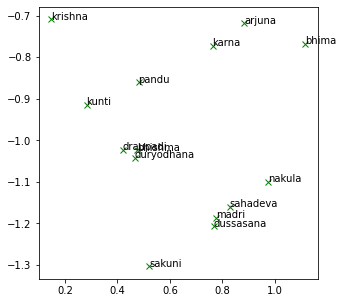

In [31]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
for character_sg, pos in zip(characters_sg, locs_sg):
    m = model_load1.wv.get_vector(character_sg)
    value = pca.transform([m])[0]
    ax.plot(value[0], value[1], "gx")
    ax.annotate(words_list_sg[pos], xy=value, xytext=value)
plt.show()
fig.savefig('word2vec_sg.png')

In [27]:
# Persons closer to the characters of our choice based on the word2vec model
for character_sg in characters_sg:
    near = model_load1.wv.most_similar(character_sg)[:5]
    nearNames = [x[0] for x in near]
    print(character_sg, ':'.join(nearNames), sep="\t")

dussasana	sakuni:duhsasana:vikarna:suvala:somadatta
sakuni	suvala:dussasana:duhsasana:vikarna:valhika
duryodhana	suyodhana:dussasana:jayadratha:sakuni:suvala
bhishma	somadatta:salya:savyasachin:bhurisrava:aswatthaman
krishna	kesava:vasudeva:govinda:madhava:vibhatsu
madri	prishata:sahadeva:nakula:subhadra:valiant
pandu	kunti:pritha:madri:subhadra:radha
kunti	pritha:pandu:radha:madri:subhadra
karna	duhsasana:jayadratha:bhagadatta:yuyudhana:kichaka
bhima	bhimasena:vrikodara:ghatotkacha:janardana:lakshmana
arjuna	partha:phalguna:dhananjaya:vibhatsu:janardana
nakula	sahadeva:madri:yuyudhana:chitrasena:duhsasana
sahadeva	nakula:madri:duhsasana:chitrasena:satyaki
draupadi	subhadra:drupada:princess:virata:madri
